#  Corner solution outcomes and censored regression:  
## Specification Issues and estimation under weaker assumptions

### Econometrics B (ØkB)

(Wooldridge Ch. 18)

Bertel Schjerning

Department of Economics, University of Copenhagen


### Outline
**Specification issues and estimation under weaker assumptions**
- Recap: Estimation of the Tobit Model 
- Neglected Heterogeneity 
- Heteroscedasticity and non-normality
- Estimation under weaker assumptions
- Computational Issues
- Bootstrapping

### Tobit - ML Estimation
**Quantities of interest**
- **Data censoring:** Latent variable model, $E\left( y^{\ast }|x\right) $or $\beta $
- **Corner Solution:** $P\left( y=0|x\right) ,$ $P\left( y>0|x\right),E\left( y|x\right) ,$ $E\left( y|x|y>0\right) $
 
**Tobit model**
$$
y=\max \left( 0,x\beta +u\right) \text{, }u|x\sim N\left( 0,\sigma^{2}\right) 
$$

Conditional log likelihood contribution
$$\mathcal{L}_i(\theta) =
\mathbb{1}(y_i=0)\ln\left(1 - \Phi\left(\frac{x_i\beta}{\sigma}\right)\right) +
\mathbb{1}(y_i>0)\ln\left(\dfrac{1}{\sigma}
  \phi\left(\dfrac{y_i-x_i\beta}{\sigma}\right)\right)$$

Inference: Carried out in standard MLE framework

### Neglected Heterogeneity
**Suppose we instead are interested in the model**
\begin{eqnarray*}
y &=&\max \left( 0,x\beta +\gamma c+u\right) \\
u|x,c &\sim &N\left( 0,\sigma ^{2}\right) \\
f\left( y|x,c\right) &=&\left[ 1-\Phi \left( \frac{x\beta +\gamma c
}{\sigma }\right) \right] ^{I\left( y=0\right) }\left[ \frac{1}{\sigma }\phi
\left( \frac{y-x\beta -\gamma c}{\sigma }\right) \right] ^{I\left(y>0\right) }
\end{eqnarray*}

**Problem:** Cannot do e.g. CML unless $c$ can be removed


**Solution:** Assume distribution for $c$ given $x:h(c|x)$

\begin{eqnarray*}
f\left( y|x\right) &=&E_{c|x}\left[ f\left( y|x,c\right) \right] \quad \text{[integrate out }c\text{]}\\
&=&\left \{ 
\begin{array}{c}
\int \left[ f\left( y|x,c\right) \right] h\left( c|x\right) dc \quad\quad \text{if }
c\text{ is continuous} \\ 
\sum \left[ f\left( y|x,c\right) \right] h\left( c|x\right) \quad \text{ if }
c\text{ is discrete}
\end{array}
\right. 
\end{eqnarray*}

### Example 1: Heterogeneity - discrete case
Two latent types in population
\begin{eqnarray*}
h\left( c|x\right) &=&\left \{ 
\begin{array}{c}
\pi \quad\quad\quad \text{ if} \quad c=a_{h}\text{ (High type)} \\ 
\left( 1-\pi \right) \quad \text{if} \quad  c=a_{l}\text{ (Low type)}
\end{array}
\right. 
\\
f\left( y|x\right) &=&\pi f\left( y|x,a_{h}\right) 
+\left( 1-\pi \right) f\left( y|x,a_{L}\right) 
\end{eqnarray*}

$\pi ,a_{H},a_{L}$ are parameters to estimate.

### Example 2: Heterogeneity - cont. case
**Assume continuous distribution of $c|x$**

Assume
$$
c|x_{i}\sim N\left( 0,\tau ^{2}\right) 
$$
This implies that $c$ and $x_{i}$ are independent. 

Therefore
\begin{eqnarray*}
y &=&\max \left( 0,x\beta +\gamma c+u\right) \\
&=&\max \left( 0,x\beta +v\right) 
\end{eqnarray*} 
where $v=\gamma c+u\sim N\left( 0,\gamma ^{2}\tau ^{2}+\sigma ^{2}\right)$

This is simply the standard Tobit model and we can proceed with standard Tobit analysis.

### Heteroscedastisity and Non-normality
**Severe consequences for Tobit**
$\hat{\beta}$ is inconsistent for $\beta$

- **Why?**: Because derived density of $y|x$ hinges crucially on 
$y^{\ast}|x\sim N\left(x\beta,\sigma_{u}^{2}\right)$

- **Censoring is costly:**: In absence of censoring, we could consistently estimate $\beta $ by assuming 
$E(u|x)=0$
- **Het. and Non-N changes objects of interest**
	$($in particular $E\left( y|x\right) \ $and $E\left( y|x,y>0\right)$)

- **Important to test for these misspecification**

# Initial setup for python illustrations 

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
import numpy as np 
from numpy import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# collection of functions used for this lecture on censored regression corner solution outcome models 
from creg import * 

# Simulation exercise 
### Heteroscedastisity and Non-normality
**Consider the model**
\begin{eqnarray*}
y &=&\max \left( 0,x\beta +\gamma c+\sigma u\right) \\
u|x,c &\sim &F\left( 0,\exp(\delta x_k)\right) \\
c &\sim &N\left( 0,1\right) \\
\end{eqnarray*}
where 
- F can be a normal distribution, a log normal, a mixture of two normal (symmetric or asymmetric)
- we normalize $var(u)=1$ 
- u is homosecedastic if $\delta=0$
- we have no neglected heterogeneity if $\gamma=0$

Implemented in 
<code>df, xvars = sim_data()</code>

Error_type=normal
---------------------------------
Tobit model
Fractions of observations that are censored:  0.3114
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.44901     0.05448     8.24178     0.00001
x1              1.09705     0.09249    11.86065    -0.00000
sigma           1.99800     0.02528    79.04923     0.00001
# of observations : 5000
# log-likelihood. : [-5472.79711104] 




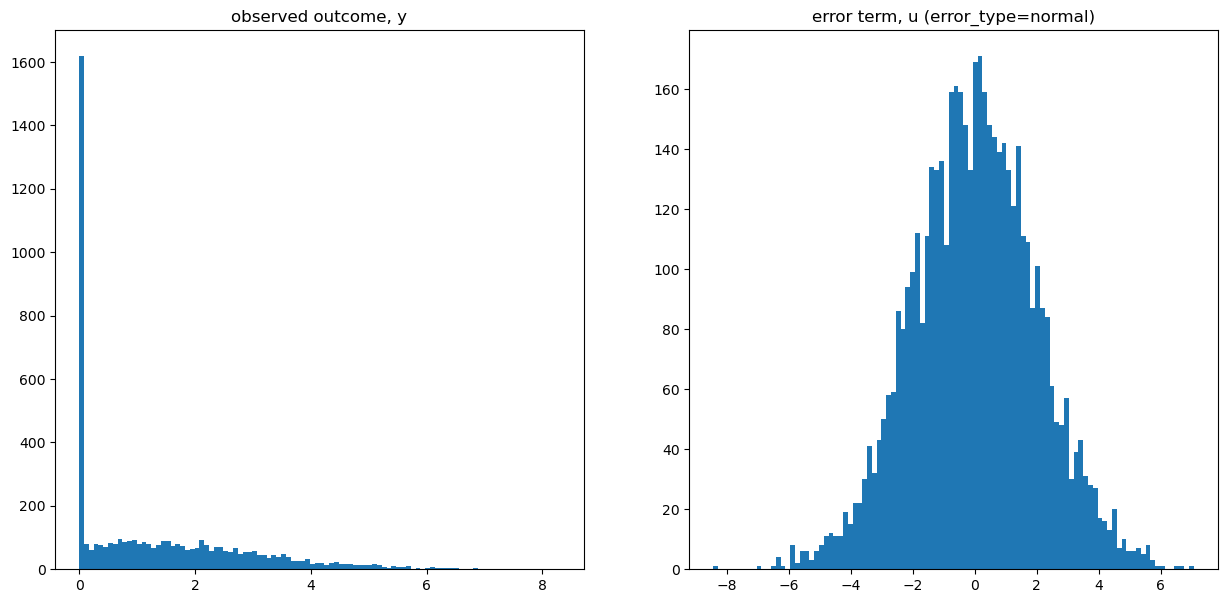

Error_type=log-normal
---------------------------------
Tobit model
Fractions of observations that are censored:  0.2812
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0             -0.38544     0.07023    -5.48848     0.00000
x1              1.91208     0.11505    16.61889    -0.00000
sigma           2.44715     0.02798    87.46876     0.00001
# of observations : 5000
# log-likelihood. : [-6044.95694894] 




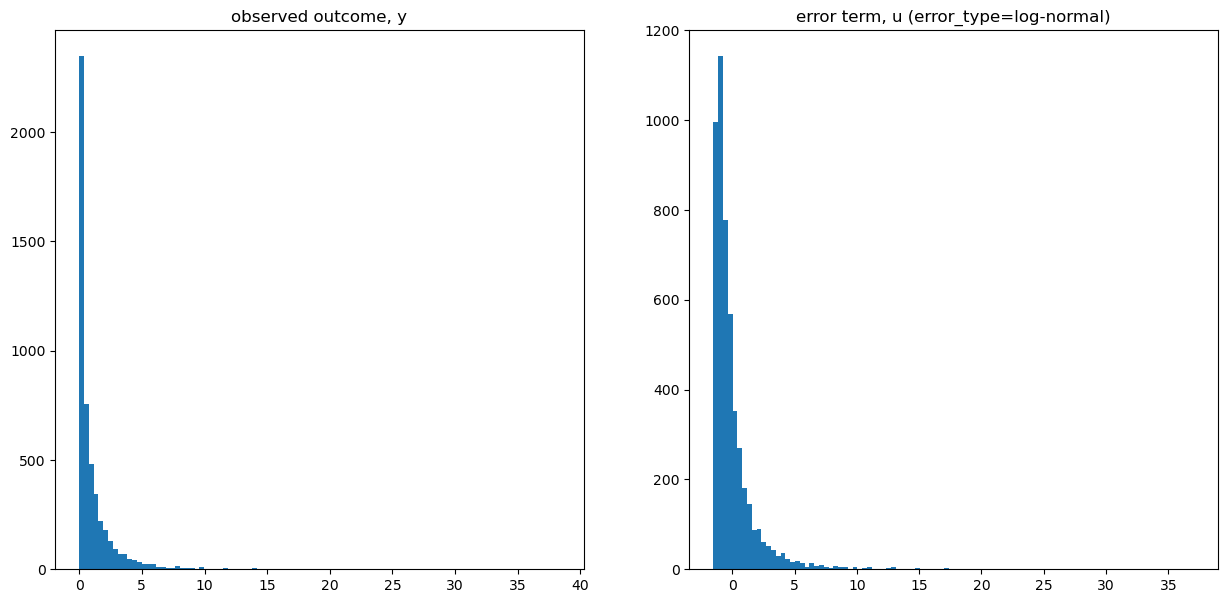

Error_type=uniform
---------------------------------
Tobit model
Fractions of observations that are censored:  0.3614
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.44407     0.06042     7.35027     0.00000
x1              0.98196     0.09937     9.88137    -0.00000
sigma           2.13861     0.02815    75.98426     0.00001
# of observations : 5000
# log-likelihood. : [-5574.38861017] 




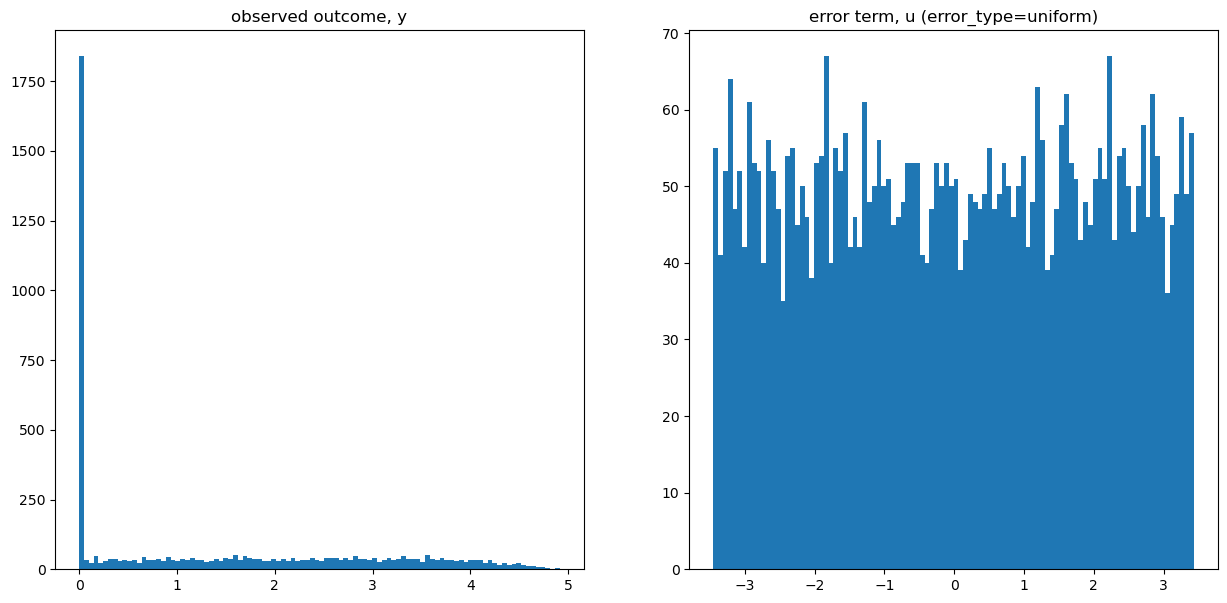

Error_type=mix_sym
---------------------------------
Tobit model
Fractions of observations that are censored:  0.4062
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.27102     0.07232     3.74775    -0.00000
x1              1.03380     0.11581     8.92648    -0.00000
sigma           2.32673     0.03195    72.82504     0.00000
# of observations : 5000
# log-likelihood. : [-5661.62187742] 




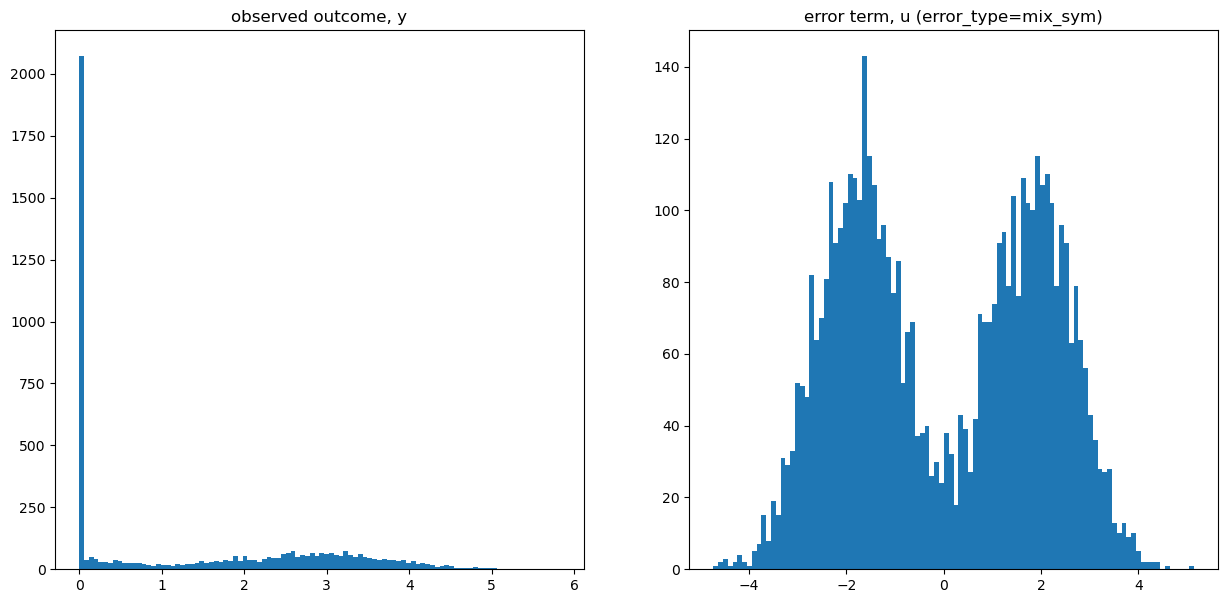

Error_type=mix_asym
---------------------------------
Tobit model
Fractions of observations that are censored:  0.315
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.76775     0.04952    15.50259    -0.00000
x1              0.72037     0.08216     8.76750    -0.00000
sigma           1.81747     0.02377    76.46217    -0.00000
# of observations : 5000
# log-likelihood. : [-5227.66770823] 




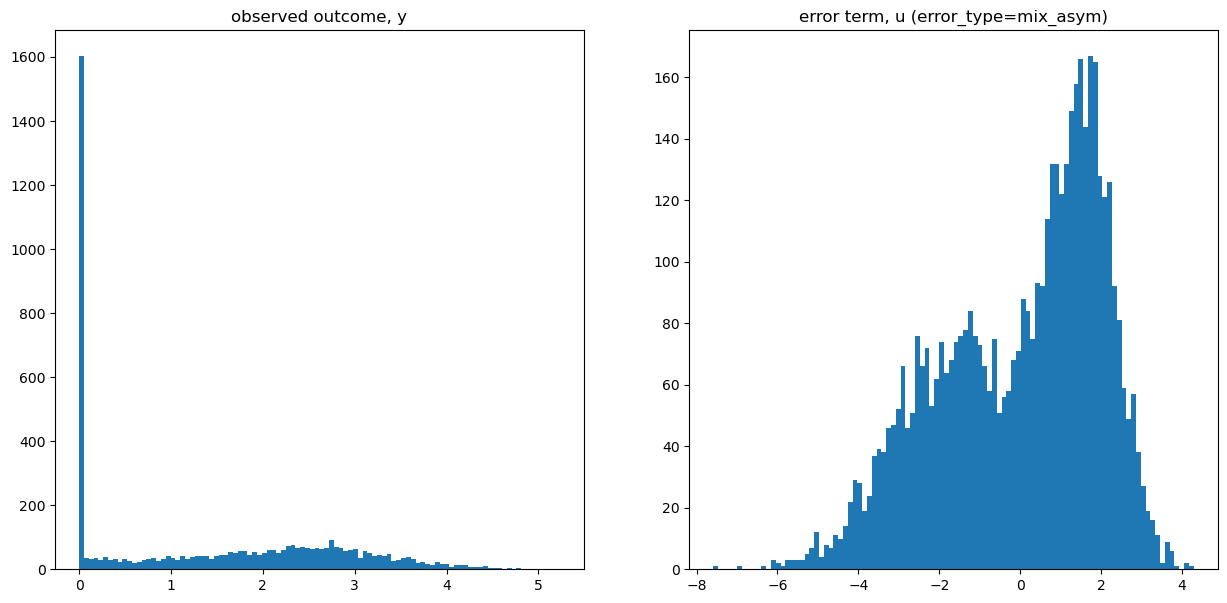

In [2]:
N=5000
# error_type can be 'normal', 'uniform', 'log-normal', 'mix_sym', or 'mix_asym'
for error_type in ['normal',  'log-normal', 'uniform', 'mix_sym', 'mix_asym']: 
    print('Error_type=%s' % error_type); print('---------------------------------')

    # try changing delta to introduce heteroscedastisity and gamma to introduce neglected heterogeneity
    # try changing and beta control amount of censoring 
    df, xvars = sim_data(N, beta=[0.5,1], sigma=2, gamma=0, delta=0, error_type=error_type) 
    
    fig, (ax) = plt.subplots(1, 2, figsize=(15,7))
    ax[0].hist(df['y'], bins=100); ax[0].set_title('observed outcome, y')
    ax[1].hist(df['u'], bins=100); ax[1].set_title('error term, u (error_type=%s)'% error_type)
    res=tobit(df['y'],df[xvars], deriv=1);
    plt.show()

# Testing for Homoscedasticity and Normality

### Testing for Homoscedasticity and Normality
**Test for homoscedasticity:**
- LM test against more general alternatives
- e.g. var$\left( u|x\right) =\sigma ^{2}\exp \left( z\delta \right) $
where $z$ is a q-dimensional subvector of $x$ 
- see Wooldridge for details 

**Test for normality:**
- Conditional moment test by Newey, Tauchen and White 
- see chapter 13 on conditional moment test for MLE 
- or next the next slides 
- Hausman type specification test against more general model 
(e.g. the Powell estimator)

### Conditional moment test for Normality (1/4)}

**Newey-Tauchen-White test statistic**
$$
\tau =\iota ^{\prime}\hat{M}\hat{Q}^{-1}\hat{M}^{\prime }\iota \overset{d}{\longrightarrow }\chi ^{2}\left( r\right) 
$$

where
- $\iota $ is a $N\times 1$ vector of ones 
- $\hat{M}$ is a $N\times r$ matrix of sample realizations of the $r$ moment restrictions
- $\hat{Q}$ is a weighting matrix

### Conditional moment test for Normality
**Moments**
- Let $u_{i}$ be the disturbances from linear model, then $u_{i}=y_{i}^{\ast}-x_{i}\beta $   
- If $u_{i}$ are normally distributed, then 
\begin{eqnarray*}
E\left[ u_{i}^{3}|x_{i}\right] &=&0  \\
E\left[ u_{i}^{4}-3\sigma ^{4}|x_{i}\right] &=&0
\end{eqnarray*}

in which case $\hat{M}_{i}$ for the third and the fourth would be
$$
\hat{M}_{i}=\left( 
\begin{array}{c}
\hat{u}_{i}^{3} \\ 
\hat{u}_{i}^{4}-3\hat{\sigma}^{4}
\end{array}
\right) ^{\prime }
$$

**Problem:** We do not observe $u_{i}$ for $y^{\ast }\leq 0$

### Conditional moment test for Normality (3/4)
**Moments for Tobit**
$$
\hat{M}_{i}=\left( 
\begin{array}{c}
I_{i}\hat{u}_{i}^{3}-(1-I_{i})\left( z_{i}^{2}+2\right) \hat{\sigma}
^{3}\lambda _{i} \\ 
I_{i}\left( \hat{u}_{i}^{4}-3\hat{\sigma}^{4}\right) +(1-I_{i})\left(
z_{i}^{2}+3\right) \hat{\sigma}^{4}\lambda _{i}z_{i}
\end{array}
\right) ^{\prime }
$$

where

\begin{eqnarray*}
I_{i} &=&1\left( y>0\right) \\
z_{i} &=&x_{i}\hat{\beta}/\hat{\sigma}\\
\lambda _{i} &=&\phi \left( x_{i}\beta /\sigma \right) /\left( 1-\Phi \left(x_{i}\beta /\sigma \right) \right)
\end{eqnarray*}

### Conditional moment test for Normality (4/4)

**Scaling matrix**
$$
Q=\left( \hat{M}-\hat{S}\hat{V}\hat{S}^{\prime }\hat{M}\right) ^{\prime
}\left( \hat{M}-\hat{S}\hat{V}\hat{S}^{\prime }\hat{M}\right) ^{\prime }
$$
where $\hat{V}$ can be either of the matrices
\begin{eqnarray*}
\hat{V}_{A} &=&\left( \hat{A}\right) ^{-1}=\left( \hat{H}\right) ^{-1}\\
\hat{V}_{B} &=&\left( \hat{B}\right) ^{-1}=\left( \hat{S}^{\prime }\hat{S}
\right) ^{-1}\\
\hat{V}_{Robust} &=&\hat{A}\left( \hat{B}\right) ^{-1}\hat{A}=\hat{H}\left(\hat{S}^{\prime }\hat{S}\right) ^{-1}\hat{H}
\end{eqnarray*}

# Estimation under weaker assumptions

### Estimation under weaker assumptions
**We still consider the model**
\begin{eqnarray*}
y^{\ast } &=&x\beta +u\\
y &=&\max \left( 0,x\beta \right) 
\end{eqnarray*}

Can we estimate $\beta $ without imposing normality and independence between $u$ and $x$?

**YES!** Under the conditional moment assumption  
$$\text{Med}(u|x)=0$$

### Powell's CLAD estimator
**Property of median**
$$
\text{Med}\left[g\left(y\right)\right] =g\left(\text{Med}\left[ y\right]\right) 
$$
if $g()$ is a (monotone) non-linear function 


**Therefore:** (nonlinear) median regression

$$
\text{Med}\left[ y|x\right] =
\max \left( 0,\text{Med}\left[ y^{\ast }|x\right] \right) 
=\max \left( 0, x\beta+\text{Med}\left[ u|x\right] \right) 
=\max \left( 0,x\beta \right) 
$$

**Hence we can estimate $\beta$ by solving** 
$$
\hat{\beta}_{CLAD}=\arg \min_{\beta }\sum_{i=1}^{N}\left \vert y_{i}-\max
\left( 0,x_{i}\beta \right) \right \vert 
$$ 

This Estimator was suggested by James Powell and often called the **Powell Estimator** .....(or the **CLAD** estimator)

### Identification: Can Powell's CLAD estimate the quantities of interest?
**Censored regression**

If distribution of $u$ is *symmetric* around zero 

$$ E\left( y^{\ast }|x\right) =\text{Med}\left( y^{\ast }|x\right) =x\beta $$

**In corner solution models**
- $P\left( y=0|x\right) $, $E\left( y|x\right) $ and $E\left(y|x,y>0\right) $ are not identified from $\text{Med}\left( u|x\right) =0$ 
- We need further distributional assumptions.
- For Tobit all of these objects depends on $\Phi \left( {}\right) )$ 
- But Powell estimator can be used as a good specification test for the Tobit

### Powell's CLAD estimator: Asymptoticss

**CLAD is an M-estimator**
$$\hat{\beta}_{clad}=\arg \min_{\beta} Q_N\left(\beta \right)=\arg \min_{\beta}1/N \sum_{i=1}^N q\left( w_{i},\beta \right) 
$$ 
where 
$$
q( w_i,\beta) =\left \vert y_{i}-\max \left(0,x_{i}\beta \right) \right \vert 
$$
- $\hat{\beta}_{clad}$ is **$\sqrt{N}-$Consistent and asymptotic normal if $\beta$ is identifiable**

But Theorem 12.3 does not hold:
- $q\left( w_{i},\beta \right)$ is not twice continuous differentiable in $\beta $ with non-singular Hessian 
- $q\left( w_{i},\beta \right)$ has a kink point where $y_{i}=\max \left( 0,x_{i}\beta \right)$ and $x_{i}\beta=0$
- sample objective function is flat when $x_i\beta <0$ for all $i$
- **Thus we cannot establish $\sqrt{N}$ asymptotic normality from Thm 12.3**- 
- Powell has an applicable theorem to establish this result. 
- You can bootstrap to get standard errors (we do that later)

# CLAD: Computational Issues

### Objective function for CLAD
$$
Q_{CLAD}(\beta)=1/N\sum_{i=1}^{N}\left \vert y_{i}-\max
\left( 0,x_{i}\beta \right) \right \vert 
$$ 

In [3]:
# Objective function for CLAD - illustration on next slide
def Q_clad(theta, y,x):
    
    return np.mean(np.abs(y-np.maximum(x@theta, 0)))

# Need lambda functions for plotting or maximizing objective functions
Qn_clad = lambda theta: Q_clad(theta, df['y'],df[xvars])
Qn_tobit= lambda theta: Q_tobit(theta, df['y'],df[xvars], out='Q') 

### Computational issues
$$
\hat{\beta}_{CLAD}=\arg \min_{\beta }\frac{1}{N}\sum_{i=1}^{N}\left \vert y_{i}-\max
\left( 0,x_{i}\beta \right) \right \vert 
$$ 
1. The objective function is non-differentiable in $\beta $ at $y_{i}=\max (0,x_{i}\beta )$ and  $0=x_{i}\beta$
	- However, for large $N$ increase these discontinuities are smoothed out 
	- This problem with kink points due to $|\cdot|$ is not specific to the censored regression model, but applies generally for LAD estimators.
    - trick: Add logit smoothing

1. For some $\beta ,$ all predicted values of $y^{\ast }$ are censored, i.e. we have $x_{i}\beta<0$ for all $i$ 
	- If this is the case $|y_{i}-\max (0,x_{i}\beta )|$ is not affected by $\beta $.

**Tobit does not suffer from this**: Objective for tobit is perfectly smooth and does not get flat even when model predict that all observations are censored

CLAD - BFGS       :  [-0.02443679  1.04592628] Desired error not necessarily achieved due to precision loss.
CLAD - Nelder-Mead:  [-0.02439797  1.0455929 ] Optimization terminated successfully.


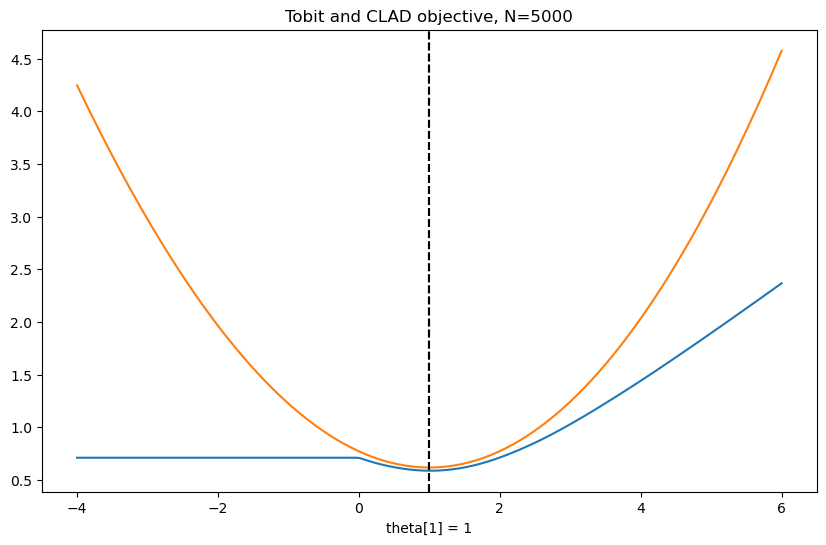

In [4]:
# Need lambda functions for plotting or maximizing objective functions
N=5000  # Number of observations
beta0=[-0,1]; sigma0=[1]; ## true parameers
df, xvars = sim_data(N, beta0, sigma0, error_type='normal') # simulate data from tobit y=max(x*beta+sigma*e,0)
Qn_clad = lambda theta: Q_clad(theta, df['y'],df[xvars])

theta0=np.ones(len(beta0))*0 # Starting values 
output = minimize(Qn_clad, theta0, method='BFGS') # rely on derivatives
print('CLAD - BFGS       : ', output.x, output.message)
output = minimize(Qn_clad, theta0, method='Nelder-Mead') # does not rely on derivatives
print('CLAD - Nelder-Mead: ', output.x,  output.message)

plt.figure(figsize=(10,6))
k=1; interval=[beta0[k]-5,beta0[k]+5]
plot_Qn(Qn_clad, beta0, k, interval)
plot_Qn(Qn_tobit, beta0+sigma0, k, interval)
plt.title('Tobit and CLAD objective, N=' + str(N)); plt.show()

### Add logit smoothing to non-differentialble functions
- **logsum** (or **smooth max**) has the max function as limit
$$
 \lim_{\lambda \to 0}\mathbb{Smax}(z_0,z_1, \lambda)= \lim_{\lambda \to 0} \lambda \log(\exp(z_0/\lambda)+\exp(z_1/\lambda)) = \max(z_0,z_1)
$$

- **logit formula** has the indicator function as limit
$$
\lim_{\lambda \to 0} \Lambda(z, \lambda)=\lim_{\lambda \to 0} \frac{1}{1+\exp(-z/\lambda)} = \mathbb{1}(z>0)
$$

- **logit smoothed sign** function $\mathbb{sign}_{\lambda}(z)=(2 \Lambda(z, \lambda)-1)$  has the sign function as limit (i.e. the function that returms 1 or -1 if z is postive or negative respectility 
$$
\lim_{\lambda \to 0} \mathbb{sign}_{\lambda}(z)=\lim_{\lambda \to 0} (2 \Lambda(z, \lambda)-1) = \mathbb{sign}(z)
$$

- **logit smoothed abs** function $\vert z \vert_\lambda=\mathbb{sign}_{\lambda}(z) \cdot z$  has the abs function as limit 
$$
\lim_{\lambda \to 0} \vert z \vert_\lambda= \lim_{\lambda \to 0} \mathbb{sign}_{\lambda}(z)z = \vert z \vert
$$
- suggests **smoothed clad objective** 
$$
\lim_{\lambda \to 0} Q_{N}^{CLAD_{\lambda}}(\beta, \lambda)
= \lim_{\lambda \to 0} \frac{1}{N} \sum_{i=1}^{N}
\vert 
(y_i-\mathbb{Smax}(0,x_{i}\beta, \lambda)
\vert_\lambda
= \frac{1}{N} \sum_{i=1}^{N}\left \vert 
y_{i}-\max
(0,x_{i}\beta) 
\right \vert 
$$ 

In [5]:
def logit(v, bw): 
    return 1/(1+np.exp(-v/bw))
def smoothabs(v, bw): 
    p=logit(v, bw);
    return (2*p-1)*v
def smoothmax(v0,v1, bw): 
    vmax= v0+np.maximum(v1-v0,0)
    return vmax + bw*np.log(np.exp((v0-vmax)/bw)+np.exp((v1-vmax)/bw))

def Q_clad_smooth(theta, y,x, bw=0.1):
    xb=x@theta
    return np.mean(smoothabs(y-smoothmax(0, xb, bw), bw))

z=-1   # argument in logit, smooth max, and smooth abs
λ=0.1  # smootning parameter
print('logit(z=%g, λ=%g)        = %g' % (z , λ, logit(z, λ)))
print('smooth max(0,z=%g, λ=%g) = %g' % (z , λ, smoothmax(0,z,λ)))
print('smooth abs(z=%g, , λ=%g) = %g' % (z , λ, smoothabs(z,λ)))

logit(z=-1, λ=0.1)        = 4.53979e-05
smooth max(0,z=-1, λ=0.1) = 4.53989e-06
smooth abs(z=-1, , λ=0.1) = 0.999909


## Smoothed clad estimator
$$
\hat{\beta_\lambda}=\arg \min_{\beta} \frac{1}{N} \sum_{i=1}^{N}
\vert 
(y_i-\mathbb{Smax}(0,x_{i}\beta, \lambda)
\vert_\lambda
$$
The objective function 
$$ 
Q_{N}^{CLAD_{\lambda}}(\beta, \lambda) = \frac{1}{N} \sum_{i=1}^{N}\vert (y_i-\mathbb{Smax}(0,x_{i}\beta, \lambda)\vert_\lambda
$$ 
- is smooth and differentiable in $\beta $ everywhere for $\lambda>0$
- the smoothed CLAD estimator, $\hat{\beta_\lambda}$ introduces smoothing bias, but is consistent if $\lambda \to 0$ as $N \to \infty$
- the principle of *kernel smoothing* is used in many contexts (e.g. non-parametric regression, tax-systems with kinks, simulators for discrete choice models, etc.)
- choosing $\lambda$: trade-off between smoothing bias and computational issues (and between bias and variance)



CLAD - BFGS       :  [ 1.17191078 -2.14330393] Desired error not necessarily achieved due to precision loss.
CLAD - SMOOTH     :  [ 1.13869188 -2.11176683] Optimization terminated successfully.
CLAD - Nelder-Mead:  [ 1.13654572 -2.01712153] Optimization terminated successfully.


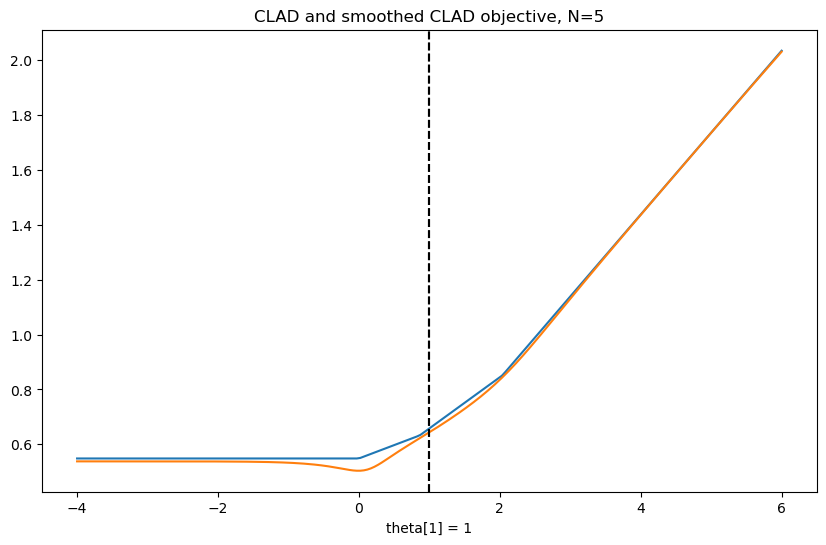

In [6]:
N=5  # Number of observations
beta0=[0,1]; sigma0=[1]; ## true parameters
λ=0.1 # smoothing parameter
df, xvars = sim_data(N, beta0, sigma0, error_type='normal') # simulate data from tobit y=max(x*beta+sigma*e,0)
Qn_clad_smooth = lambda theta: Q_clad_smooth(theta, df['y'],df[xvars], bw=λ)
Qn_clad = lambda theta: Q_clad(theta, df['y'],df[xvars])

theta0=np.ones(len(beta0))*0 # Starting values 
output = minimize(Qn_clad, theta0, method='BFGS'); print('CLAD - BFGS       : ', output.x, output.message)
output = minimize(Qn_clad_smooth, theta0, method='BFGS'); print('CLAD - SMOOTH     : ', output.x, output.message)
output = minimize(Qn_clad, theta0, method='Nelder-Mead'); print('CLAD - Nelder-Mead: ', output.x,  output.message)

plt.figure(figsize=(10,6))
k=1; interval=[beta0[k]-5,beta0[k]+5]
plot_Qn(Qn_clad, beta0, k, interval)
plot_Qn(Qn_clad_smooth, beta0, k, interval)
plt.title('CLAD and smoothed CLAD objective, N=' + str(N)); plt.show()

### How to obtain CLAD estimator without smoothing
**When objective function have flat regions or discontinuous derivatives**
It can be hard to maximize the likelihood function using gradient based maximization methods for small $N$
- BGFS, Newton-Raphson and BHHH often fails for small $N$ $\to$ use Nelder-Mead
- most algorithms would fail, if started at the flat segment

**Alternatively**
We can use an estimation technique for the Powell estimator based on an iterative linear programming algorithm (ILPA)

### Iterative linear programming algorithm (ILPA) 

**Steps for ILPA**
1. Estimate a median regression for the full sample
1. Delete the observations for which the predicted value of the dependent variable is less than zero.
1. Iterate on 1) and 2) until convergence

That is
- Another median regression is estimated on the new sample, and again negative predicted values are dropped.

Buchinsky (1991) shows that *if the process converges*, then a local minimum is obtained.

- Convergence occurs when there are no negative predicted values in two consecutive iterations.

### Iterative linear programming algorithm (ILPA).
**The median regression in step 1**
- When estimating the median regressions we essentially solve the
problem $\min_{\tilde{\beta}}\frac{1}{n}\sum_{i=1}^{N}|y_{i}-x_{i}\tilde{\beta}|$
- by reformulating the minimization problem to a linear programming
problem and solve this using a simplex based method.
- We use the quantile regression routine from statsmodels.QuantReg

## Python illustration

In [7]:
def clad_ilpa(yvar, xvars, maxiter_ilpa=20, quiet=False, b=None):  
    x=np.array(xvars)
    N, K, xvars=labels(x)
    y=np.array(yvar).reshape(N,1)

    if np.mean(1*(y>0))<0.5:
        print('Error: More than half of observations are censored. Beta is unidentified')
        return np.nan*np.ones((K,1))

    if b is None: # use lad estimates as starating values
        lad=sm.QuantReg(y,x).fit(q=0.5, p_tol=1e-05)
        b=np.array(lad.params).reshape(-1,1)

    for i in range(maxiter_ilpa):
        b0=b;
        yhat=x@b
        lad=sm.QuantReg(y[yhat>0],x[yhat[:,0]>0,:]).fit(q=0.5,p_tol=1e-05)
        b=np.array(lad.params).reshape(-1,1)

        if (b==b0).all():  # "convrgence achieved";
            if quiet==False:
                print('CLAD finished in %d iterations using ILPA' %i)
                print('Fractions of observations that are censored: ', np.mean(1*(y==0)))
                print(lad.summary())    
            return np.array(b).reshape(-1,1)
    
    return np.nan*np.ones((K,1))

In [8]:
## NOTE DTANDAERD ERRORS BELOW ARE NOT VALID (out put is simply from the last LAD estimation from ILPA )
df, xvars = sim_data(N=10000, beta=[.5,2], sigma=1, delta=1, error_type='normal') # simulate data from tobit y=max(x*beta+sigma*e,0)
b=clad_ilpa(df['y'], df[xvars])

CLAD finished in 0 iterations using ILPA
Fractions of observations that are censored:  0.0697
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1523
Model:                       QuantReg   Bandwidth:                      0.2054
Method:                 Least Squares   Sparsity:                        2.187
Date:                Tue, 14 Mar 2023   No. Observations:                10000
Time:                        12:42:15   Df Residuals:                     9998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5010      0.022     22.801      0.000       0.458       0.544
x1             1.9686      0.038     51.755      0.000       1.894       2.043


# Bootstrapped standard errors 

### Bootstrapping
There are two ways of obtaining standard errors for an estimate:
- Asymptotics, e.g. Theorem 12.3 for M-Estimators
- Bootstrrapping

**Bootstrapping:** 
- Method for estimating distribution of estimator or test statistic by re-sampling one's data 
- Similar to Monte Carlo, but treating the observed sample as if it was the population.
- Bootstrapping is an easy way to obtain
	- Standard errors
	- Confidence intervals
	- Critical values and p-values for test statistics
- Why and when Bootstrapping works is much difficult and outside the curriculum

### Why the bootstrap?
- Sometimes difficult to derive asymptotic distribution of an estimator or statistic, e.g. 2-step estimators, CLAD or APE's (or other statistics derived from parameter estimates)
- Asymptotic results may be very inaccurate in finite samples
	- very difficult to derive small sample properties of estimators.
	- Bootstrap often approximates the distribution of an estimator or test statistic well and often more accurate in finite samples.

### Why not bootstrap?
- Computational expensive 
 
 model has to be estimated many times (say more than 500 times)
- Bootstrap's numerical performance may be poor, when estimators whose asymptotic covariance matrices are "nearly singular (for example IVE with weak instruments)
- Bootstrap is sometimes biased and should not be used blindly or uncritically

### Why is the method called the bootstrap?

*Baron Munchausen is both a historical and literary character. The historical
character lived in Germany in the 18th century. When he was young he joined
the Russian army where he became captain. He retired at the age of 30 and
lived the rest of his life at his manor. He is known to have told witty and
exaggerated stories mainly about his time in the Russian army. In one of
these stories, he falls into a swamp and cannot get up. According to the
story he pulled himself up by the bootstrap.*

Note: 
There actually seems to be disagreement whether he pulled himself up by the bootstrap or the hair.

### Road map, Bootstrapping

Several types of bootstrap (when data is iid)
- **nonparametric bootstrap** (we will do this)
- parametric Bootstrap 
- non-parametric residual bootstrap

**Block bootstrap (Panel data)**
- As above but here it is the cross-sectional units we sample randomly


### The nonparametric bootstrap
The algorithm for the nonparametric bootstrap is:

1. Estimate model on original sample to obtain the statistic $T_{N}$
1. Draw a random samples (with replacement) of size $N$.
1. Use the bootstrap sample to obtain an estimate $T_{N,b}^{\ast }$.
1. Repeat 2)-3) many times to obtain a sequence of bootstrap estimates, $T_{N,b}^{\ast }$, $b=1,..,B$.

- Calculate for example the standard deviation of the $B$ values of $
T_{N,b}^{\ast }$.

### Statistics

**The sample variance**
\begin{equation*}
\frac{1}{B-1}\sum_{b=1}^{B}\left[ T_{N,b}^{\ast }-\bar{T}_{N}^{\ast }\right] 
\left[ T_{N,b}^{\ast }-\bar{T}_{N}^{\ast }\right] ^{\prime }
\end{equation*}
where, $\bar{T}_{N}^{\ast }$ is the mean of the $B$ bootstrap statistics $
T_{N,b}^{\ast }$, can be used to obtain standard errors for $T_{N}$.

- **95 \% confidence intervals**: 

 can be obtain by finding $0.025$ and $0.975$ percentiles in the bootstrap distribution of $T_{N}^{\ast }$

- **$p$-value of a test statistic**: 

 fraction of times the bootstrap test-statistics exceeding the test statistic from the sample

### The Block Bootstrap (for panel data)

The bootstrap procedure for panel data:
1. Estimate panel data model on original sample to obtain $T_{N}$.
1. The bootstrap sample is created by repeatedly drawing (with
replacement) an *individual*
	- including all $T$ observations for the drawn individual
	- the draws continue until the sample size $NT$ is reached.
1. Use the bootstrap sample to obtain an estimate $T_{N,b}^{\ast }$.
1. Repeat 2)-3) $B$ times to obtain a sequence of bootstrap estimates, $
T_{N,b}^{\ast }$, $b=1,..,B$.
1. Calculate for example the standard deviation of the $B$ values of $
T_{N,b}^{\ast }$.

## Pyhon: Bootstrap vs Monte Carlo

In [9]:
def bootstrap(df, estimator, nB=1): # sample from data set with replacement
    theta_hat=estimator(df)
    N=df.shape[0]
    nP=theta_hat.shape[0]
    thetas_B=np.empty((nP, nB))
    
    for iB in range(nB):
        ## bootstrap sample (sample from data set with replacement)
        dfB=df.sample(N, replace=True)
        thetas_B[:,iB]=estimator(dfB, theta0=theta_hat).T
        
    print('parameter estimate   ', theta_hat.reshape(1,nP).round(5))
    print('E(theta_B)           ', np.nanmean(thetas_B, axis=1).round(5))
    print('bootstrap SE         ', np.nanstd(thetas_B, axis=1).round(5))
    print('faction not converged', np.mean(thetas_B==np.nan))
    return thetas_B

def montecarlo(dgp, estimator, nMC=1, theta0=None): # sample from data generating process (dgp)
    df, xvars = dgp()
    theta_hat=estimator(df)
    N=df.shape[0]
    thetas_MC=np.empty((theta_hat.shape[0], nMC))
    
    for iMC in range(nMC):
        ## Monte carlo sample (sample from DGP)
        dfMC, xvars=dgp()
        thetas_MC[:,iMC]=estimator(dfMC, theta0=theta_hat).T

    print('E(theta_MC)          ', np.nanmean(thetas_MC, axis=1))
    print('MCSE                 ', np.nanstd(thetas_MC, axis=1).round(5))
    print('faction not converged', np.mean(thetas_MC==np.nan).round(5))
    
    return thetas_MC;

### Illustration: Tobit vs CLAD
Goal: Find bootstrap and Monte Carlo standard errors for Tobit and CLAD

In [10]:
def b_tobit(df, theta0=None):
    res=tobit(df['y'], df[xvars], theta0=theta0, quiet=True); 
    return res.theta_hat.reshape(-1,1)

def b_clad(df, theta0=None): return clad_ilpa(df['y'], df[xvars], maxiter_ilpa=20, b=theta0, quiet=True)

In [11]:
dgp =lambda: sim_data(N=5000, beta=[0,1], sigma=[1], delta=[3], error_type='normal') 
df, xvars=dgp()
res=tobit(df['y'], df[xvars])
nrep=500 # Number of bootstrap/monte carlo samples 
print('Tobit (beta and sigma):'),
tobit_B=bootstrap(df   , b_tobit, nB=nrep)
tobit_MC=montecarlo(dgp, b_tobit, nMC=nrep)
print('\nCLAD (only beta):')
clad_B=bootstrap(df   , b_clad, nB=nrep)
clad_MC=montecarlo(dgp, b_clad, nMC=nrep)

Tobit model
Fractions of observations that are censored:  0.2354
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0             -0.25892     0.02736    -9.46298     0.00000
x1              1.48552     0.04514    32.91006     0.00000
sigma           0.92767     0.01123    82.63017    -0.00000
# of observations : 5000
# log-likelihood. : [-2688.40437408] 


Tobit (beta and sigma):
parameter estimate    [[-0.25892  1.48552  0.92767]]
E(theta_B)            [-0.26027  1.48858  0.92782]
bootstrap SE          [0.02373 0.05794 0.0197 ]
faction not converged 0.0
E(theta_MC)           [-0.27489129  1.50952539  0.93436285]
MCSE                  [0.05777 0.0928  0.01575]
faction not converged 0.0

CLAD (only beta):
parameter estimate    [[0.00638 0.98395]]
E(theta_B)            [0.00551 0.98625]
bootstrap SE          [0.00927 0.03369]
faction not converged 0.0
E(theta_MC)           [-0.002689    1.00697137]
MCS

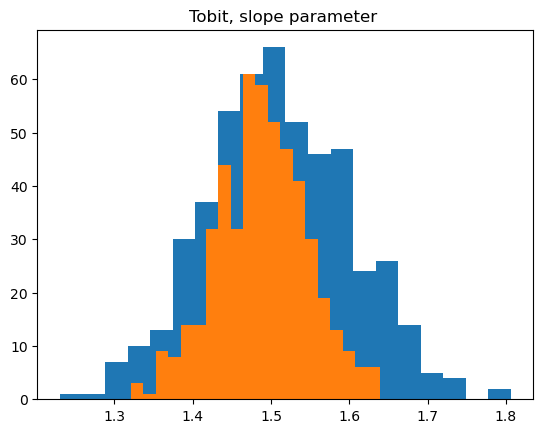

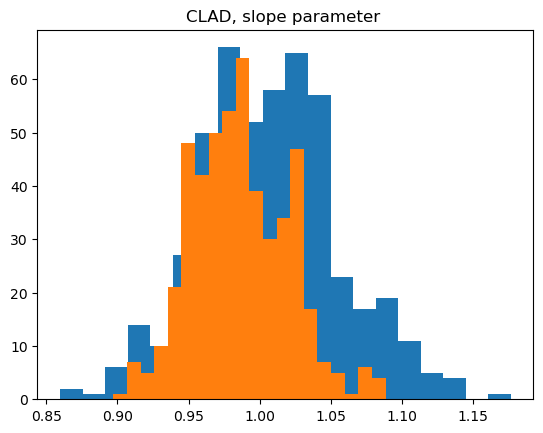

In [15]:
# Plot montecarlo and bootstrap distribution of parameters
# Does distribution look approximately standard normal as theory would predict?
def plot_histogram(thetas, title='parameter'): 
        plt.hist(thetas, bins=20)
        plt.title(title)
            
plot_histogram(tobit_MC[1,:], 'Tobit, slope parameter ')
plot_histogram(tobit_B[1,:], 'Tobit, slope parameter ')
plt.show()
plot_histogram(clad_MC[1,:], 'CLAD, slope parameter ')
plot_histogram(clad_B[1,:], 'CLAD, slope parameter ')
plt.show()


# Concluding remarks

## Concluding remarks

- The tobit model offers an **appropriate specification** under normality and homoscedasticity
for **censored regression models** and **corner solution outcome models**.
- It relies on **strong distributional assumptions** for **consistency** of MLE.
- These assumptions are testable (conditional moment test, LM or LR tests against more general alternatives)  
- **Semi-parametric approaches** that relax the distributional assumptions
are possible: Powell's CLAD estimator
    - CLAD always breaks down when more that half the sample is censored.
    - CLAD can at best identify $E(y^*|x)$ but not $E(y|x)$
    - Objective function for CLAD is non-differentiable - but is smoothed out in the limit as $N \to \infty$
    - Possible to use smoothed version of CLAD, but this may introduce bias
    - Inference CLAD is non-standard (possible to use bootstrap) 